In [1]:

import os
import warnings

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import seaborn as sns
import pandas as pd
import earthpy as et
import datetime
import matplotlib.ticker

import numpy as np
from scipy.signal import argrelextrema

# Handle data time conversion between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings('ignore')

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

C:\Users\nick.lamkey\Miniconda3\envs\earth-analytics-python\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
path_to_working_directory = os.path.join(et.io.HOME, "earth-analytics", "LCRWS")

if os.path.exists(path_to_working_directory):
    print("Path exists, set as working directory")
    os.chdir(os.path.join(et.io.HOME, "earth-analytics", "LCRWS"))
else:
    print("Path does not exist, creating directories")
    os.mkdir(path_to_working_directory)
    os.chdir(os.path.join(et.io.HOME, "earth-analytics", "LCRWS"))


Path exists, set as working directory


In [3]:
gauge_path = os.path.join(path_to_working_directory,'data',"missouri-river-near-maskal.csv")
precip_path = os.path.join(path_to_working_directory,'data',"vermillion-precip.csv")
pumping_path = os.path.join(path_to_working_directory,'data',"pumping-rates-july.csv")
obsv_path = os.path.join(path_to_working_directory,'data', "pumping-rates.csv")
all_data_path = os.path.join(path_to_working_directory,'data','all_data_lcrws.csv')
gavins_path = os.path.join(path_to_working_directory, "data","gavinspoint_discharge_stage_2015.csv" )

In [4]:
vermillion_precip = pd.read_csv(precip_path,
                                       parse_dates=['DATE'],
                                       index_col=['DATE'],
                                       na_values=['999.99'])
vermillion_precip

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD
DATE,,,,,,,,
2015-03-01,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
2015-03-02,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
2015-03-03,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
2015-03-04,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
2015-03-05,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
...,...,...,...,...,...,...,...,...
2015-09-26,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
2015-09-27,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
2015-09-28,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0


In [5]:
precip_day_sum = vermillion_precip['2015-03-01':'2015-09-30'].resample(
    'M').sum()

precip_list = precip_day_sum['PRCP'].values.tolist()
precip_list
df = precip_day_sum["PRCP"].mean()

In [6]:
discharge = pd.read_csv(gauge_path,
                        parse_dates=['datetime'],
                        index_col=['datetime'])
discharge

,agency_cd,site_no,stage,quality
datetime,,,,
2015-03-01 00:00:00,USGS,6478526,19.85,A
2015-03-01 00:15:00,USGS,6478526,19.86,A
2015-03-01 00:30:00,USGS,6478526,19.85,A
2015-03-01 00:45:00,USGS,6478526,19.83,A
2015-03-01 01:00:00,USGS,6478526,19.84,A
...,...,...,...,...
2015-09-30 22:45:00,USGS,6478526,21.16,A
2015-09-30 23:00:00,USGS,6478526,21.15,A
2015-09-30 23:15:00,USGS,6478526,21.16,A


In [7]:
max_day_discharge =discharge['2015'].resample(
    'D').agg({'stage': ['max']})
max_day_discharge

,stage
,max
datetime,
2015-03-01,19.86
2015-03-02,19.77
2015-03-03,19.81
2015-03-04,19.74
2015-03-05,19.44
...,...
2015-09-26,21.22
2015-09-27,21.18


In [8]:
max_day_discharge.columns = max_day_discharge.columns.map('-'.join)
max_day_discharge

,stage-max
datetime,
2015-03-01,19.86
2015-03-02,19.77
2015-03-03,19.81
2015-03-04,19.74
2015-03-05,19.44
...,...
2015-09-26,21.22
2015-09-27,21.18
2015-09-28,21.20


In [9]:
gauge_height = 1100.00
max_day_discharge['stage-max']= max_day_discharge['stage-max'] + gauge_height
max_day_discharge

,stage-max
datetime,
2015-03-01,1119.86
2015-03-02,1119.77
2015-03-03,1119.81
2015-03-04,1119.74
2015-03-05,1119.44
...,...
2015-09-26,1121.22
2015-09-27,1121.18
2015-09-28,1121.20


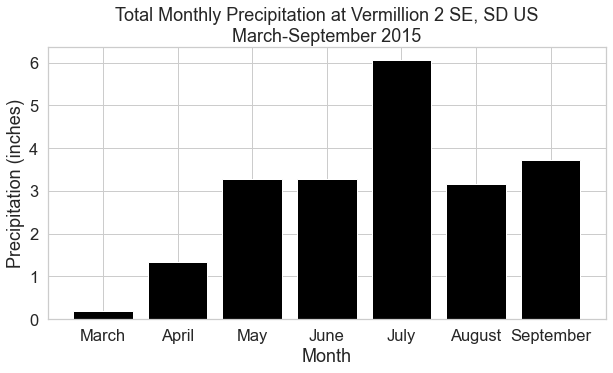

In [10]:
fig, (ax1) = plt.subplots(figsize=(10, 5))
months = ['March','April','May','June','July','August','September']
start = datetime.datetime(2015,3,1)
end = datetime.datetime(2015,9,30)
dates_list = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days+1)]

# Subplot daily total precipitation for the flood event from precip_2013_day_sum
ax1.bar(months,
        precip_list,
        color='black')

ax1.set(xlabel="Month",
        
        ylabel="Precipitation (inches)",
        title="Total Monthly Precipitation at Vermillion 2 SE, SD US\nMarch-September 2015"
        )


# ax1.set_xlim(dates_list[0],dates_list[-1])

# ax1.xaxis.set_major_formatter(myFmt)
# ax1.xaxis.set_major_locator(days)
# ax1.xaxis.set_minor_locator(dayss)

# locs = list(ax1.get_xticks())+ [mdates.date2num(datetime.datetime(2015,9,30))]
# locator= matplotlib.ticker.FixedLocator(locs)
# ax1.xaxis.set_major_locator(locator)
# plt.setp(ax1.get_xticklabels(), rotation=45)

# Subplot daily stream discharge for the flood event from stream_discharge_2013
plt.show()

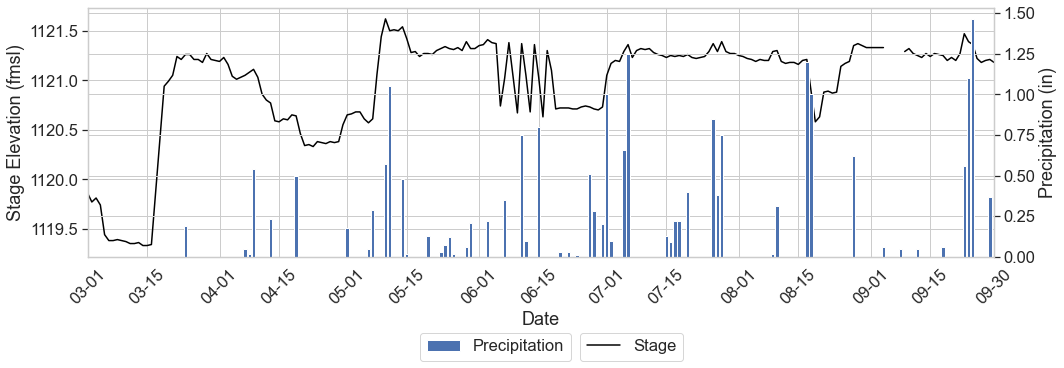

In [11]:
fig, ax2 = plt.subplots(figsize=(15,5))

myFmt = mdates.DateFormatter('%m-%d') 
months = mdates.MonthLocator()  
days = mdates.DayLocator(bymonthday=(1,15))   
dayss = mdates.DayLocator()

ax2.plot(max_day_discharge.index.values,
         max_day_discharge['stage-max'],
         color='black',
         label="Stage")

ax2.set(xlabel="Date",
        ylabel="Stage Elevation (fmsl)")
        
#         title="Daily Stage at Missouri River near Maskell, Nebr\n03-01-2015 to 09-30-2015 and Daily Precipitation")

ax3 = ax2.twinx()

ax3.bar(vermillion_precip.index.values,
    vermillion_precip["PRCP"],
       label='Precipitation')

ax3.set(ylabel="Precipitation (in)")
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.set_xlim(dates_list[0],dates_list[-1])

ax2.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_locator(days)
ax2.xaxis.set_minor_locator(dayss)

locs = list(ax2.get_xticks())+ [mdates.date2num(datetime.datetime(2015,9,30))]
locator= matplotlib.ticker.FixedLocator(locs)
ax2.xaxis.set_major_locator(locator)
plt.tight_layout()
# ax2.legend(loc="upper right", bbox_to_anchor=(1., 1.3))
# ax3.legend(loc="upper right", bbox_to_anchor=(1, 1.19))

ax2.legend(loc="lower center", bbox_to_anchor=(.6, -.45))
ax3.legend(loc="lower center", bbox_to_anchor=(.45, -.45))
plt.show()

In [12]:
pumping_rates = pd.read_csv(pumping_path,
                                       parse_dates=['Date'],
                                       index_col=['Date']
                                       )
pumping_rates["Q_all_wells"]
pumping_rates['Q_MGD'] = pumping_rates['Q_all_wells'] / 133680.55419447
pumping_rates

,Well,Q,Q_all_wells,Q_MGD
Date,,,,
2015-07-01,09-1,262905.0899,7.887153e+05,5.9
2015-07-02,09-1,253993.0530,7.619792e+05,5.7
2015-07-03,09-1,231712.9606,6.951389e+05,5.2
2015-07-04,09-1,249537.0345,7.486111e+05,5.6
2015-07-05,09-1,236168.9791,7.085069e+05,5.3
...,...,...,...,...
2015-07-27,03-1,155069.4429,7.753472e+05,5.8
2015-07-28,03-1,195173.6091,9.758680e+05,7.3
2015-07-29,03-1,173784.7205,8.689236e+05,6.5


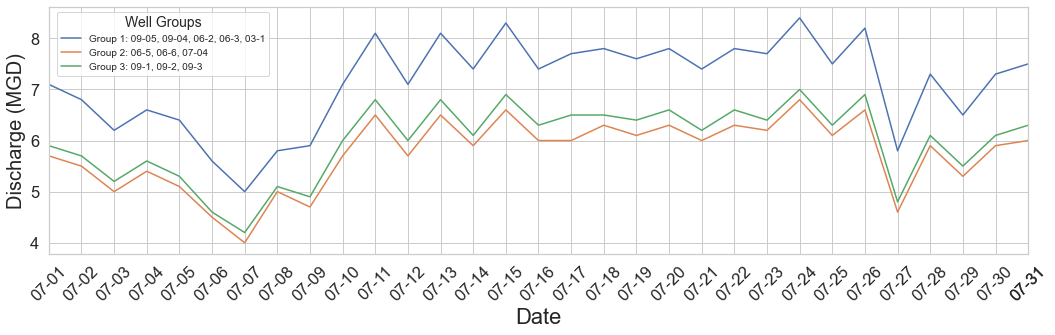

In [13]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 5))

labels = {"Group 1"": " "09-05, 09-04, 06-2, 06-3, 03-1":['Group 1'],
          "Group 2"": " "06-5, 06-6, 07-04":['Group 2'],
          "Group 3"": ""09-1, 09-2, 09-3" :['Group 3']
          }
color = sns.color_palette("Paired", n_colors=10)


for i, k in pumping_rates.groupby("Well"):
    k.groupby("Well").plot(y="Q_MGD",
                           label=i,

                           ax=ax)


plt.ylabel("Discharge (MGD)", fontsize=20)
# fig.suptitle("Daily Production Well Discharge for July 2015", fontsize='22')
plt.xlabel("Date", fontsize="22")
ax.legend(labels=labels,
          title='Well Groups', title_fontsize='14', fontsize="10",bbox_to_anchor=(0.23, 1))
# leg = ax.get_legend()
# leg.legendHandles[0].set_color('yellow')
# leg.legendHandles[1].set_color('black')

start = datetime.datetime(2015, 7, 1)
end = datetime.datetime(2015, 7, 31)
dates_list = [start + datetime.timedelta(days=x)
              for x in range(0, (end-start).days+1)]
myFmt = mdates.DateFormatter('%m-%d')
months = mdates.MonthLocator()
days = mdates.DayLocator()
dayss = mdates.DayLocator(bymonthday=())


plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_xlim(dates_list[0], dates_list[-1])

ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_minor_locator(dayss)

locs = list(ax.get_xticks()) + \
    [mdates.date2num(datetime.datetime(2015, 7, 31))]
locator = matplotlib.ticker.FixedLocator(locs)
ax.xaxis.set_major_locator(locator)

out_path = os.path.join(path_to_working_directory,"well_discharge.png")
plt.tight_layout()
plt.savefig(out_path,dpi=300)

In [14]:
obs_wells = pd.read_csv(obsv_path,
                        parse_dates=['date'],
                        index_col=['date'],
                        na_values=['999.99'])


df = obs_wells.dropna()


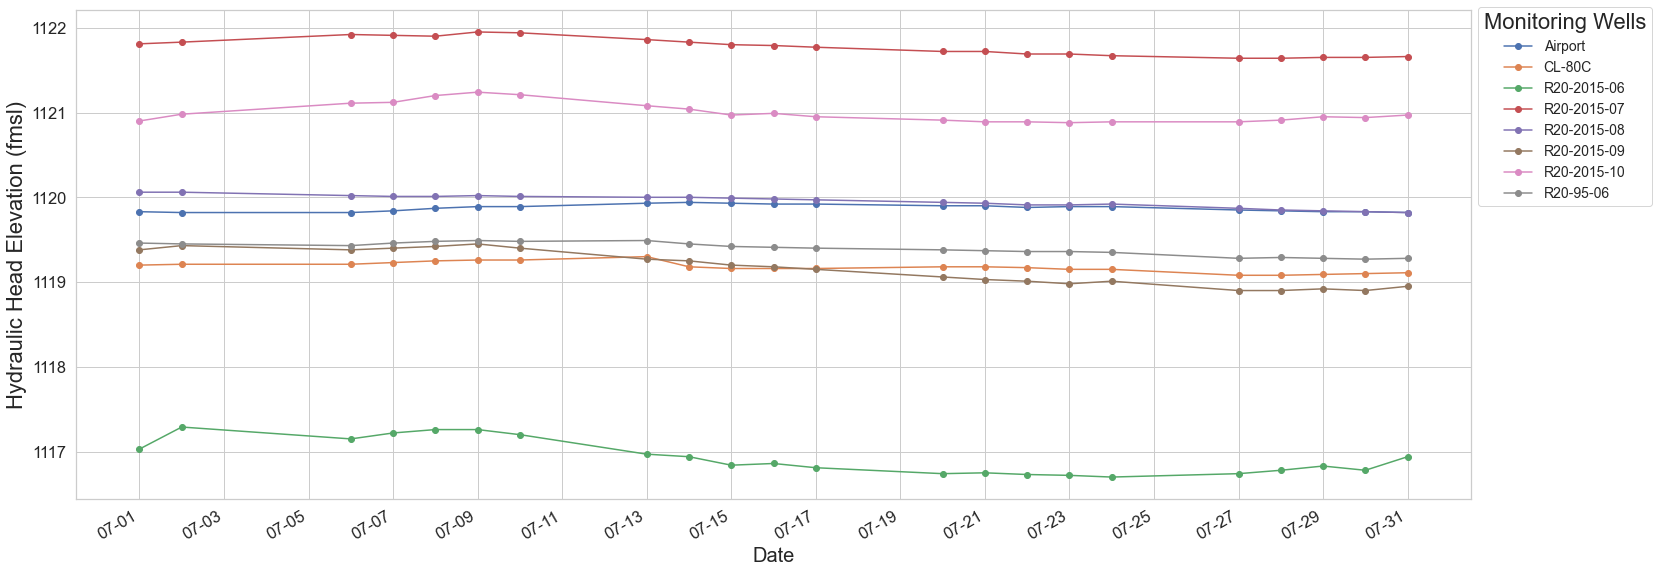

In [15]:

fig, ax = plt.subplots(figsize=(25,10))


for label, grp in df.groupby('Name'):
    grp.groupby('Name').plot(
        
             y="head",
             ax=ax,
             label=label,
             marker="o"
             
            )
ax.legend(bbox_to_anchor=(1., 1.02),loc='upper left',prop={'size':14},title='Monitoring Wells',title_fontsize='22',
          fontsize='22')

# start = datetime.datetime(2015,6,30)
# end = datetime.datetime(2015,8,1)
# dates_list = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days+1)]    
# ax.set_xlim(dates_list[0],dates_list[-1])

# myFmt = mdates.DateFormatter('%m-%d') 
# months = mdates.MonthLocator()  
# days = mdates.DayLocator()   
# dayss = mdates.DayLocator(bymonthday =()) 

# ax.xaxis.set_major_formatter(myFmt)
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_minor_locator(days)
# ax.xaxis.set_minor_locator(dayss)

# locs = list(ax.get_xticks())+ [mdates.date2num(datetime.datetime(2015,7,31))]
# locator= matplotlib.ticker.FixedLocator(locs)
# ax.xaxis.set_major_locator(locator)

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))


# fig.suptitle("Hydraulic Head Measurments for July 2015", fontsize="22")
plt.xlabel("Date",fontsize='20')
plt.ylabel("Hydraulic Head Elevation (fmsl)", fontsize='22')
plt.show()

In [16]:
label

'R20-95-06'

In [17]:
# Import file with all data from filipovic report
all_data = pd.read_csv(all_data_path,
                       parse_dates=['Date'],
                       na_values='---')

In [40]:
all_data.mean()

CL-80C            1119.246567
Airport           1119.846493
R20-95-06         1119.480226
R20-2015-06       1117.313657
R20-2015-07       1121.862388
R20-2015-08       1120.056642
R20-2015-09       1119.411045
R20-2015-10       1120.997164
min_riv           1120.868534
max_riv           1121.003874
avg_riv           1120.936204
north_group          4.992228
middle_group         4.823438
south_group          5.964062
n_cfd           667363.811948
m_cfd           644799.806831
s_cfd           797279.191019
dtype: float64

In [18]:
# Convert pumping rates to cubic feet per day and export by group
all_data['n_cfd'] = all_data['north_group']*133680.556
all_data['m_cfd'] = all_data['middle_group']*133680.556
all_data['s_cfd'] = all_data['south_group']*133680.556
d ={'north_group':all_data['n_cfd'],'south_group':all_data['s_cfd'],'middle_group':all_data['m_cfd'],'date':all_data['Date']}
well_df = pd.DataFrame(data=d)
d2 = {'09-1':well_df['north_group']/3,'09-2':well_df['north_group']/3,'09-3':well_df['north_group']/3,
      '06-6':well_df['middle_group']/3,'06-5':well_df['middle_group']/3,'07-4':well_df['middle_group']/3,
     '06-2':well_df['south_group']/5,'06-3':well_df['south_group']/5,'03-1':well_df['south_group']/5,
      '09-4':well_df['south_group']/5,'09-5':well_df['south_group']/5,'date':all_data['Date']}
all_wells = pd.DataFrame(data=d2)

In [19]:
all_wells=all_wells.set_index('date')

In [20]:
# stack all wells
stacked = all_wells.stack()
# Export to csv
out = os.path.join(path_to_working_directory,"all_wells_dates.csv")
stacked.to_csv(out)

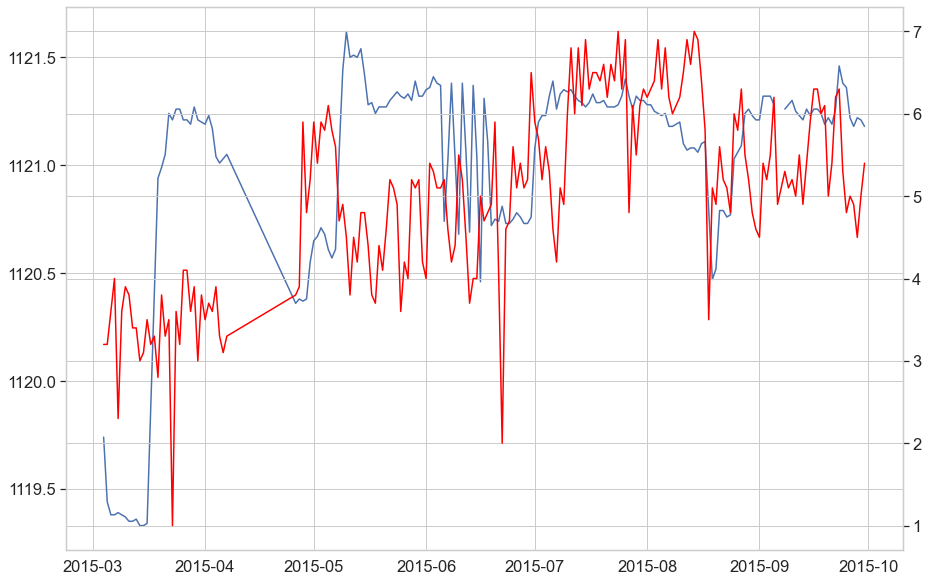

In [21]:
f, ax = plt.subplots(figsize=(15,10))

ax.plot(all_data['Date'],
        all_data['max_riv'])

# ax.plot(all_data['Date'],
#         all_data['min_riv'])
# ax.plot(all_data['Date'],
#         all_data['avg_riv'])
ax2=ax.twinx()
ax2.plot(all_data['Date'],
        all_data['north_group'],
        color='red')

In [22]:
# Get Base flow at gavins point dam

gavins = pd.read_csv(gavins_path,
                     parse_dates=['date'])
# Find local mins and max
gavins['min'] = gavins.discharge[(gavins.discharge.shift(1) > gavins.discharge) & (gavins.discharge.shift(-1) > gavins.discharge)]
gavins['max'] = gavins.discharge[(gavins.discharge.shift(1) < gavins.discharge) & (gavins.discharge.shift(-1) < gavins.discharge)]

loc_min = argrelextrema(gavins.discharge.values, np.less_equal, order=3)[0]
loc_max = argrelextrema(gavins.discharge.values, np.greater_equal, order=3)[0]
rolling_min = gavins.discharge.rolling(24, min_periods=1).min()


<AxesSubplot:>

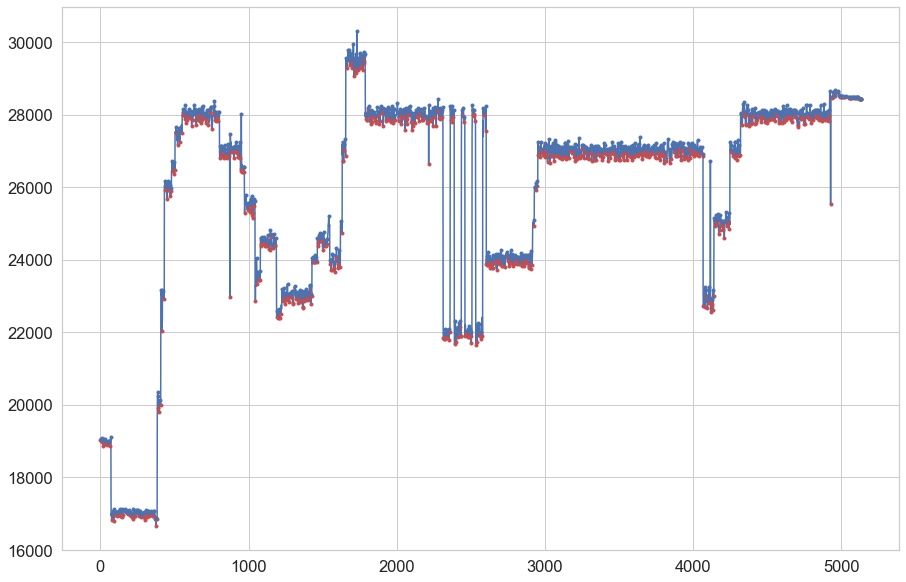

In [23]:
gavins.discharge.plot(figsize=(15,10))
gavins.iloc[loc_min].discharge.plot(style='.',c='r')
gavins.iloc[loc_max].discharge.plot(style='.',c='b')


In [24]:
gavins=gavins.set_index('date')
gavins

,Type,stage,discharge,Local Minimum,Fixed Interval,Sliding Interval,min,max
date,,,,,,,,
2015-03-01 01:00:00,1,1206.87,19022.0,NaN,0.12,0.00,NaN,NaN
2015-03-01 02:00:00,2,1206.87,19022.0,0.13,0.12,0.13,NaN,NaN
2015-03-01 03:00:00,3,1206.89,19022.0,0.14,0.12,0.13,NaN,NaN
2015-03-01 04:00:00,4,1206.91,19070.0,0.14,0.13,0.13,NaN,19070.0
2015-03-01 05:00:00,5,1206.89,19034.0,0.14,0.23,0.13,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-09-30 20:00:00,5131,1207.41,28429.0,NaN,NaN,NaN,NaN,NaN
2015-09-30 21:00:00,5132,1207.43,28429.0,NaN,NaN,NaN,NaN,NaN
2015-09-30 22:00:00,5133,1207.39,28429.0,NaN,NaN,NaN,NaN,NaN


In [25]:
# Resample gavins point data for daily values
gavins_mean_dis =gavins.resample(
    'D').agg({'discharge': ['mean']})
gavins_mean_dis.columns = gavins_mean_dis.columns.map('-'.join)

out = os.path.join(path_to_working_directory, "data","gavins_2015_resampled_mean_day.csv")
gavins_mean_dis.to_csv(out)

In [26]:
# Load in sioux city discharge values
sioux_path = os.path.join(path_to_working_directory,"data","daily_dis_values_missouri_river_sioux_city_2015.txt" )
sioux = pd.read_csv(sioux_path,sep='\t')
sioux = sioux.drop(columns = ['43164_00060_00003_cd'])
sioux = sioux.rename(columns={'43164_00060_00003': 'discharge'})
sioux['discharge'] = sioux['discharge'].astype('float')
sioux['datetime'] = sioux['datetime'].astype('datetime64[ns]')
sioux = sioux.set_index('datetime')

In [27]:
# Load in vermillion, big sioux, james river discharge
james_path= os.path.join(path_to_working_directory, "data","jamers_river_dis_2013_2021.csv")
verm_path = os.path.join(path_to_working_directory, "data","vermillion_river_near_vermillion_dis_2013_2021.csv")
big_path = os.path.join(path_to_working_directory, "data","bigsiouxriver_near_sioux_city_dis_2015_2021.csv")

james = pd.read_csv(james_path,
                    parse_dates=['Unnamed: 9'])
james = james.rename(columns={'Unnamed: 9':'date'})
james = james.set_index('date')
verm = pd.read_csv(verm_path,
                  parse_dates=['date'],
                  index_col='date')
big = pd.read_csv(big_path,
                  parse_dates=['date'],
                  index_col='date')

In [28]:
verm

,agency_cd,site_no,parameter_cd,ts_id,month_nu,day_nu,begin_yr,end_yr,count_nu,mean_va
date,,,,,,,,,,
2015-01-01,USGS,6479010,60,128843,1,1,2014,2021,8,157
2015-01-02,USGS,6479010,60,128843,1,2,2014,2021,8,155
2015-01-03,USGS,6479010,60,128843,1,3,2014,2021,8,154
2015-01-04,USGS,6479010,60,128843,1,4,2014,2021,8,153
2015-01-05,USGS,6479010,60,128843,1,5,2014,2021,8,153
...,...,...,...,...,...,...,...,...,...,...
2015-12-27,USGS,6479010,60,128843,12,27,2014,2021,8,165
2015-12-28,USGS,6479010,60,128843,12,28,2014,2021,8,164
2015-12-29,USGS,6479010,60,128843,12,29,2014,2021,8,163


In [29]:
# subtract discharges from gavins to sioux to get difference (water loss between)
sioux['gavins_dis'] = gavins_mean_dis['discharge-mean']

gw_inflow = (sioux['discharge'] - (sioux['gavins_dis'] +james['mean_va'] +verm['mean_va'] +big['mean_va'] )).dropna().reset_index()
gw_inflow = gw_inflow.rename(columns={0:'dis','index':'date'})

gw_inflow = gw_inflow.set_index('date')
gw_inflow

,dis
date,
2015-03-01,-6046.260870
2015-03-01,-1717.260870
2015-03-02,-1755.708333
2015-03-03,-2119.833333
2015-03-04,-743.458333
...,...
2015-09-27,-6952.416667
2015-09-28,-6080.875000
2015-09-29,-5164.791667


In [30]:
# Resample data for plotting
gw =gw_inflow.resample(
    'M').agg({'dis': ['mean']})
gw.columns = gw.columns.map('-'.join)
gw

,dis-mean
date,
2015-03-31,-8155.826319
2015-04-30,-9153.576389
2015-05-31,-7862.143817
2015-06-30,-4966.479167
2015-07-31,-2797.016129
2015-08-31,-230.770161
2015-09-30,-5254.919444
2015-10-31,-4290.000000


In [31]:
# Distance between sioux city and gavins point is 72 miles 
# Length modeled missouri river segment is 7.47 miles

gw['avg-at-site'] = gw['dis-mean'] *0.10375
gw

,dis-mean,avg-at-site
date,,
2015-03-31,-8155.826319,-846.166981
2015-04-30,-9153.576389,-949.683550
2015-05-31,-7862.143817,-815.697421
2015-06-30,-4966.479167,-515.272214
2015-07-31,-2797.016129,-290.190423
2015-08-31,-230.770161,-23.942404
2015-09-30,-5254.919444,-545.197892
2015-10-31,-4290.000000,-445.087500


In [32]:
# Positive values indicate faining stream due to grownd water flow
# negaive values indicate losing stream reach and recharge to alluvial aquifer

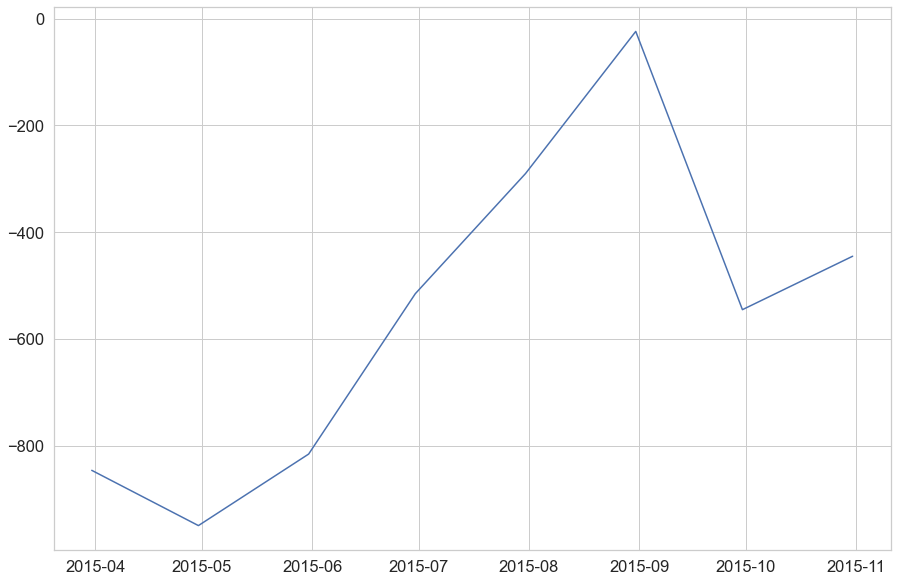

In [33]:
f, ax = plt.subplots(figsize=(15,10))
ax.plot(gw.index.values,
        gw['avg-at-site'])
